## 3. Visualização de Dados

### 3.1 Gráficos com matplotlib e seaborn

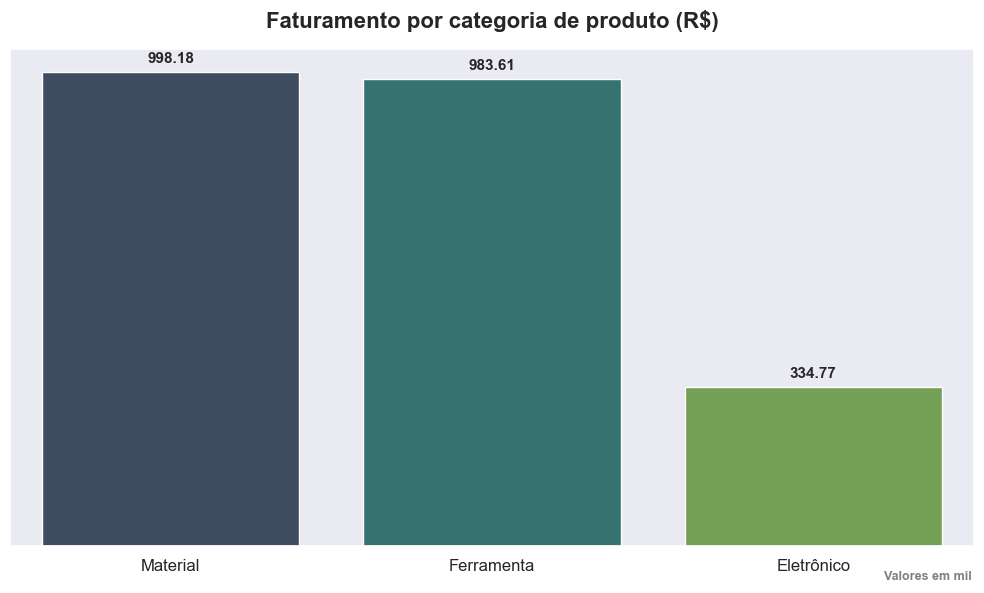

In [ ]:
# Vamos visualizar nosso faturamento por categoria
fat_categoria = (
    df_vendas.groupby("Categoria_Produto")[["Valor_Final"]]
    .agg({
        "Valor_Final":"sum"
    })
    .sort_values("Valor_Final",ascending=False)
    .reset_index()
)

fat_categoria["Valor_Final_K"] = (fat_categoria["Valor_Final"] / 1000).round(2)

# Visualizando o gráfico
fig, ax = plt.subplots(1,1,figsize=(10,6))
sns.set_style("whitegrid")
ax1 = sns.barplot(
    data=fat_categoria,
    x="Categoria_Produto",
    hue="Categoria_Produto",
    y="Valor_Final_K",
    palette=["#3b4c66", "#2c7c78", "#70ad47"],
    legend=False,
    ax=ax
)

ax.set_title("Faturamento por categoria de produto (R$)",fontsize=16,weight="bold", pad=15)
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", left=False, labelleft=False)
ax.grid(False)

# Acrescentando rodulo de dados

for p in ax.patches:
    valor = p.get_height()
    ax.text(
        x= p.get_x() + p.get_width()/2,
        y=valor + 20,
        ha="center",
        s=valor,
        fontsize=11,
        fontweight="bold"
    )

plt.figtext(
    x=0.98,
    y=0.02,
    s="Valores em mil",
    ha="right",
    fontsize=9,
    weight="bold",
    color="gray"
)
plt.tight_layout()


Resultado da análise

🔹 Faturamento por categoria

Observamos que nosso faturamento está concentrado com as maiores partes na categoria de "material" e "ferramenta".

📌 Insight de negócio: Podemos estudar a possibilidade de realizarmos vendas com convergência ou seja numa venda de material vender eletrônico em um mix.

###  3.2 Gráfico Interativos com Plotly

In [ ]:
# Gráfico Interativo: Campanha x Canal x Região

# Dados
camp_canal_regiao = df_vendas.groupby(["Região","Campanha_Marketing","Canal_Venda"])["Valor_Final"].sum().reset_index()

ordem_campanha=["Nenhuma","Campanha A","Campanha B"]

# Reordenando as campanhas
camp_canal_regiao["Campanha_Marketing"] = pd.Categorical(
    camp_canal_regiao["Campanha_Marketing"],
    categories=ordem_campanha,
    ordered=True
)

camp_canal_regiao=camp_canal_regiao.sort_values("Campanha_Marketing")

cores = {
    "Nenhuma": "#AA9FB1",
    "Campanha A": "#7871AA",
    "Campanha B": "#4E5283"
}

fig = px.bar(
    data_frame=camp_canal_regiao,
    x="Região",
    y="Valor_Final",
    color="Campanha_Marketing",
    facet_col="Canal_Venda",
    text_auto=".2s",
    labels={
        "Valor_Final":"Valor Total (R$)",
        "Campanha_Marketing":"Campanha",
        "Região": "Região",
        "Canal_Venda":"Canal"
    },
    color_discrete_map=cores,
    title=("Faturamento por Campanha, Canal e Região")   
)

fig.update_layout(
    title_font_size=18,
    legend_title="Campanhas",
    yaxis_tickprefix="R$",
    bargap=0.15,
    height=500
)
fig.update_traces(textfont_size=11)

fig.show()

Resultado da análise

🔹 Canal Online
A Campanha A se destaca nas regiões Leste e Oeste enquanto na Norte ambas as campanhas obtêm resultados equivalentes.  
Já a Campanha B lidera nas regiões Sul e Centro-Oeste, mas nesta última, o destaque negativo fica por conta do desempenho superior sem nenhuma campanha – um sinal claro de que a estratégia de marketing para essa região precisa ser completamente revisada.

🔹 Canal Físico  
A Campanha B lidera em todas as regiões, com exceção da Sul onde a Campanha A mostra maior impacto no faturamento.

📌 Insight de negócio:  
É crucial personalizar as campanhas de acordo com a região e canal de venda Investir mais em campanhas digitais nas regiões onde já performam bem e reavaliar a abordagem no Centro-Oeste, onde os investimentos atuais não estão se traduzindo em retorno.


### 3.3 Dashboard simples com streamlit

In [ ]:
# Baixe o arquivo localizado na pasta app, abra o terminal do vs code e execute o comando abaixo:

# streamlit run "seu caminho onde esta o arquivo"

# exemplo de como o caminho deve ser: G:/Meu Drive/Data Science/Sales Insights/app/dashboard.py

### 3.4 Criar um Heatmap de Correlação

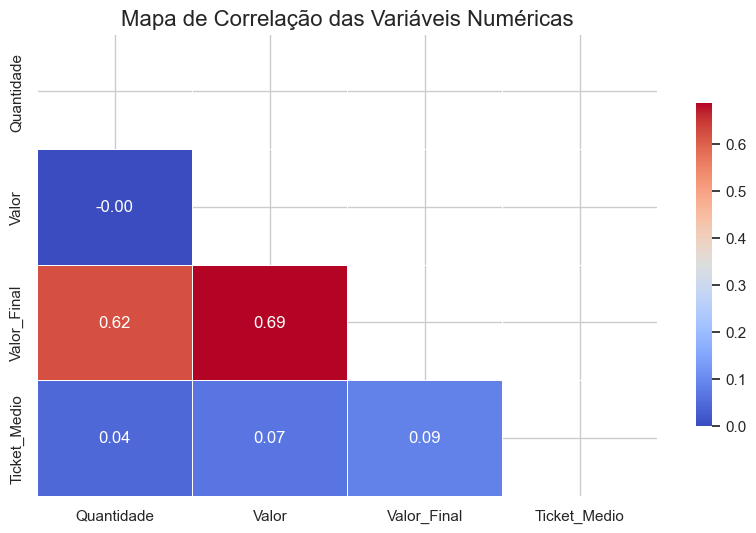

In [ ]:
# Correlação

correlação = df_vendas.loc[:,["Quantidade","Valor","Valor_Final","Ticket_Medio"]]

matriz_correlação = correlação.corr()

# Criando mascara para exibir metade do mapa
mask = np.triu(np.ones_like(matriz_correlação, dtype=bool))

plt.figure(figsize=(10,6))
sns.heatmap(
    data=matriz_correlação,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    mask=mask,
    linewidths=0.5,
    cbar_kws={"shrink":0.7}
)

plt.title("Mapa de Correlação das Variáveis Numéricas", fontsize=16)
plt.show()

Resultado da analise

🔹 Análise de Correlação das Variáveis Numéricas
Realizamos uma análise de correlação entre as variáveis numéricas do conjunto de dados: Quantidade, Valor, Valor_Final e Ticket_Medio.

O mapa de calor gerado evidenciou que:

A maior correlação observada foi entre Valor e Valor_Final (0,69), indicando uma relação moderada.

Também houve uma correlação moderada entre Quantidade e Valor_Final (0,62).

As demais correlações foram muito baixas (próximas de zero), sugerindo pouca ou nenhuma relação linear direta entre as variáveis analisadas.

Destaca-se a baixa correlação do Ticket_Medio com as demais variáveis, o que sugere que o ticket médio dos clientes é relativamente independente das quantidades vendidas e dos valores unitários.

Esses resultados indicam que não há forte multicolinearidade entre as variáveis, o que é positivo para futuros modelos preditivos.

In [ ]:
# Vamos analisar a correlação por Canal de Venda

for canal, grupo in df_vendas.groupby("Canal_Venda"):
    print(f"Canal de venda {canal}")
    matriz_correlação = grupo[["Quantidade","Valor","Valor_Final","Ticket_Medio" ]].corr()
    display(matriz_correlação)

Canal de venda Loja Física


,Quantidade,Valor,Valor_Final,Ticket_Medio
Quantidade,1.000000,0.002765,0.621990,0.045010
Valor,0.002765,1.000000,0.688397,0.065687
Valor_Final,0.621990,0.688397,1.000000,0.084232
Ticket_Medio,0.045010,0.065687,0.084232,1.000000


Canal de venda Online


,Quantidade,Valor,Valor_Final,Ticket_Medio
Quantidade,1.000000,-0.003960,0.621513,0.044672
Valor,-0.003960,1.000000,0.686681,0.065348
Valor_Final,0.621513,0.686681,1.000000,0.089824
Ticket_Medio,0.044672,0.065348,0.089824,1.000000


Bonus

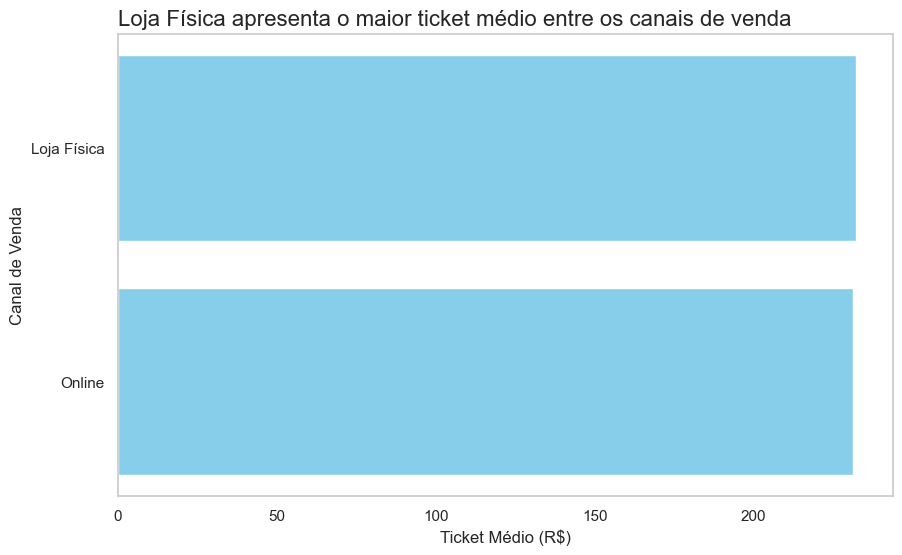

In [ ]:
# 1. Agrupar e calcular a média
media_valor_final_canal = df_vendas.groupby("Canal_Venda")["Valor_Final"].mean().sort_values(ascending=False).round(2)

# 2. Plotar o gráfico
plt.figure(figsize=(10,6))
plt.barh(
    y=media_valor_final_canal.index,
    width=media_valor_final_canal.values,
    color="skyblue"
)

# 3. Ajustes visuais
plt.title("Loja Física apresenta o maior ticket médio entre os canais de venda", fontsize=16, loc="left")
plt.xlabel("Ticket Médio (R$)", fontsize=12)
plt.ylabel("Canal de Venda", fontsize=12)
plt.grid(False)
plt.gca().invert_yaxis()  # Canal de maior média no topo
plt.show()